In [1]:
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Add, Dense, Input
from keras.models import Model
import random

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

Using TensorFlow backend.


## Using GANs to Generate Family of Lines Passing through Origin
Each Sample is a 100 dimensional vector representing a line. A line is represented by 100 points. A data point is represented by just its y position, x positon (-50 to 50) is indicated by its index

In [0]:
INPUT_DIM=100
NO_TRAIN_SAMPLES=3000

In [3]:
np.arange(-INPUT_DIM/2,INPUT_DIM/2) # x-axis

array([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40.,
       -39., -38., -37., -36., -35., -34., -33., -32., -31., -30., -29.,
       -28., -27., -26., -25., -24., -23., -22., -21., -20., -19., -18.,
       -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.])

In [0]:
randomangles=np.random.uniform(0.1,2*np.pi,NO_TRAIN_SAMPLES)

In [0]:
def create_sample(θ):
  #print(angle)
  y=np.ones((INPUT_DIM))
  x=np.arange(-INPUT_DIM/2,INPUT_DIM/2)
  for _,i in enumerate(x):
    y[int(i)]=np.tan(θ)*(x[int(i)]) #y=tan(θ)x
  return y

def plot_lines(data,save=None):
  x=np.arange(-INPUT_DIM/2,INPUT_DIM/2)
  for y in data:
    plt.plot(y,x)
  axes = plt.gca()
  axes.set_xlim([-INPUT_DIM/2,INPUT_DIM/2])
  axes.set_ylim([-INPUT_DIM/2,INPUT_DIM/2])
  if(save!=None):
    plt.savefig(save+".png")
  plt.show()

In [0]:
DATA=np.array([create_sample(θ) for θ in randomangles])

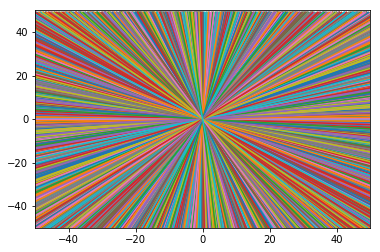

In [11]:
plot_lines(DATA,save="Real")

array([-130.97299851, -128.35353854, -125.73407857, -123.1146186 ,
       -120.49515863, -117.87569866, -115.25623868, -112.63677871,
       -110.01731874, -107.39785877, -104.7783988 , -102.15893883,
        -99.53947886,  -96.92001889,  -94.30055892,  -91.68109895,
        -89.06163898,  -86.44217901,  -83.82271904,  -81.20325907,
        -78.5837991 ,  -75.96433913,  -73.34487916,  -70.72541919,
        -68.10595922,  -65.48649925,  -62.86703928,  -60.24757931,
        -57.62811934,  -55.00865937,  -52.3891994 ,  -49.76973943,
        -47.15027946,  -44.53081949,  -41.91135952,  -39.29189955,
        -36.67243958,  -34.05297961,  -31.43351964,  -28.81405967,
        -26.1945997 ,  -23.57513973,  -20.95567976,  -18.33621979,
        -15.71675982,  -13.09729985,  -10.47783988,   -7.85837991,
         -5.23891994,   -2.61945997,    0.        ,    2.61945997,
          5.23891994,    7.85837991,   10.47783988,   13.09729985,
         15.71675982,   18.33621979,   20.95567976,   23.57513

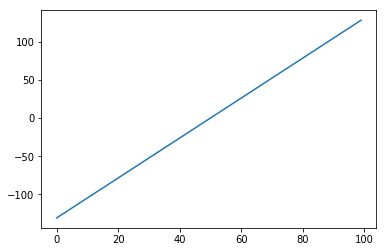

In [17]:
#sample Data
DATA.shape
plt.plot(DATA[0])
DATA[0]

### Generator

In [0]:
INP_NOISE_SHAPE=10
def generator():
  i=Input(shape=(INP_NOISE_SHAPE,))
  d1=Dense(30,activation="linear")(i)
  d2=Dense(70,activation="linear")(d1)
  o=Dense(100,activation="linear")(d2)
  model=Model(inputs=i,outputs=o)
  model.compile(loss='binary_crossentropy', optimizer="adam")############### FAKE, WE WILL NEVER USE IT
  return model

In [0]:
gen=generator()
gen.summary()##### WE WiLL NVER ACTUALLY DO gen.fit

W0622 05:04:23.640377 140522554181504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 05:04:23.664104 140522554181504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 05:04:23.669111 140522554181504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 05:04:23.724560 140522554181504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0622 05:04:23.760902 140522554181504 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 70)                2170      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               7100      
Total params: 9,600
Trainable params: 9,600
Non-trainable params: 0
_________________________________________________________________


### Discriminator

In [0]:
def discriminator():
  i=Input(shape=(INPUT_DIM,))
  d1=Dense(200,activation="tanh")(i)
  d2=Dense(80,activation="tanh")(d1)
  d3=Dense(20,activation="tanh")(d2)
  o=Dense(1,activation="sigmoid")(d3)
  model=Model(inputs=i,outputs=o)
  model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["acc"])
  return model

In [0]:
disc=discriminator()
disc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 37,921
Trainable params: 37,921
Non-trainable params: 0
_________________________________________________________________


### Joint Model

In [0]:
#create joint model
geninp = Input((INP_NOISE_SHAPE,))
genout = gen(geninp)
discout = disc(genout)
jointmodel = Model(geninp, discout)
jointmodel.compile(loss="binary_crossentropy", optimizer='adam',metrics=["acc"])
jointmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10)                0         
_________________________________________________________________
model_1 (Model)              (None, 100)               9600      
_________________________________________________________________
model_2 (Model)              (None, 1)                 37921     
Total params: 47,521
Trainable params: 47,521
Non-trainable params: 0
_________________________________________________________________


## Train Discriminator-Generator

1.   Sample Real Data, Label 1
2.   Sample Fake Data, **Label 0**
3.   Train Discrimiator
4.   Freeze Discriminator
5.   Sample Fake Data, **Label 1**
6.   Train Joint Model
7.    REPEAT



W0622 05:04:27.649952 140522554181504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



Train Discriminator
4000/4000 [==============================] - 0s 58us/step
0.99975
Train Generator


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2000/2000 [==============================] - 0s 147us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 36us/step
0.99875
Train Generator
2000/2000 [==============================] - 0s 41us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 36us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 41us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 70us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 42us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 51us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 47us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 38us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 39us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 38us/step
1.0
Train Generator
2000/2000 [========================

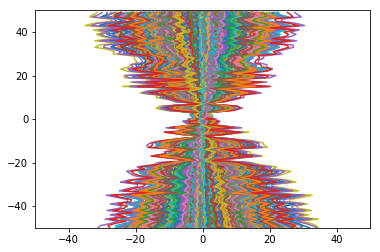

Train Discriminator
4000/4000 [==============================] - 0s 40us/step
0.9985
Train Generator
2000/2000 [==============================] - 0s 41us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 36us/step
0.99975
Train Generator
2000/2000 [==============================] - 0s 40us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 40us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 40us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 36us/step
0.998
Train Generator
2000/2000 [==============================] - 0s 41us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 40us/step
0.99975
Train Generator
2000/2000 [==============================] - 0s 40us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 39us/step
0.74075
Train Generator
2000/2000 [==============================] - 0s 39us/step
0.9995
Train Discriminat

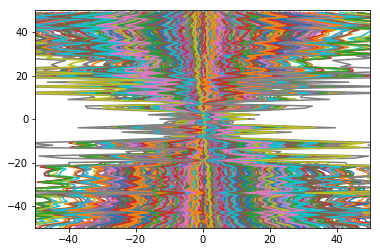

Train Discriminator
4000/4000 [==============================] - 0s 37us/step
0.998
Train Generator
2000/2000 [==============================] - 0s 40us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 37us/step
0.99925
Train Generator
2000/2000 [==============================] - 0s 47us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 36us/step
0.9995
Train Generator
2000/2000 [==============================] - 0s 41us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 41us/step
0.9995
Train Generator
2000/2000 [==============================] - 0s 42us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 66us/step
0.78425
Train Generator
2000/2000 [==============================] - 0s 62us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 71us/step
0.99475
Train Generator
2000/2000 [==============================] - 0s 82us/step
1.0
Train Discrimi

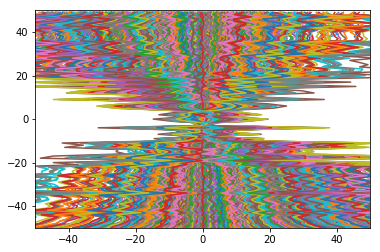

Train Discriminator
4000/4000 [==============================] - 0s 70us/step
0.99525
Train Generator
2000/2000 [==============================] - 0s 65us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 68us/step
0.998
Train Generator
2000/2000 [==============================] - 0s 62us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 65us/step
0.73675
Train Generator
2000/2000 [==============================] - 0s 61us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 73us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 87us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 56us/step
0.99975
Train Generator
2000/2000 [==============================] - 0s 65us/step
0.999
Train Discriminator
4000/4000 [==============================] - 0s 72us/step
0.998
Train Generator
2000/2000 [==============================] - 0s 65us/step
0.999
Train Discr

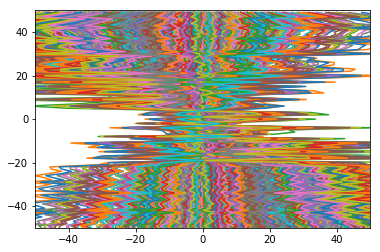

Train Discriminator
4000/4000 [==============================] - 0s 69us/step
0.90125
Train Generator
2000/2000 [==============================] - 0s 62us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 70us/step
0.99975
Train Generator
2000/2000 [==============================] - 0s 64us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 64us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 70us/step
0.9985
Train Discriminator
4000/4000 [==============================] - 0s 65us/step
0.995
Train Generator
2000/2000 [==============================] - 0s 76us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 67us/step
0.73775
Train Generator
2000/2000 [==============================] - 0s 66us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 62us/step
0.7385
Train Generator
2000/2000 [==============================] - 0s 67us/step
1.0
Train Discriminator


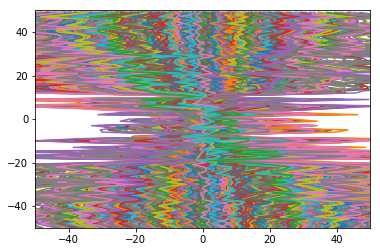

Train Discriminator
4000/4000 [==============================] - 0s 67us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 68us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 66us/step
0.75675
Train Generator
2000/2000 [==============================] - 0s 71us/step
0.997
Train Discriminator
4000/4000 [==============================] - 0s 64us/step
0.79775
Train Generator
2000/2000 [==============================] - 0s 74us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 73us/step
0.9995
Train Generator
2000/2000 [==============================] - 0s 70us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 53us/step
0.998
Train Generator
2000/2000 [==============================] - 0s 73us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 68us/step
0.9065
Train Generator
2000/2000 [==============================] - 0s 71us/step
1.0
Train Discriminator

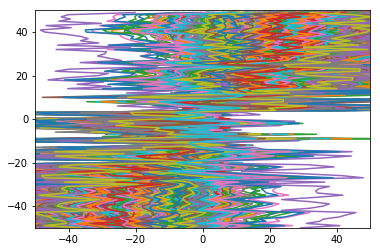

Train Discriminator
4000/4000 [==============================] - 0s 63us/step
0.99975
Train Generator
2000/2000 [==============================] - 0s 61us/step
0.9985
Train Discriminator
4000/4000 [==============================] - 0s 61us/step
0.999
Train Generator
2000/2000 [==============================] - 0s 71us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 61us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 67us/step
0.9995
Train Discriminator
4000/4000 [==============================] - 0s 71us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 70us/step
0.999
Train Discriminator
4000/4000 [==============================] - 0s 62us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 77us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 65us/step
0.9995
Train Generator
2000/2000 [==============================] - 0s 70us/step
1.0
Train Discriminator


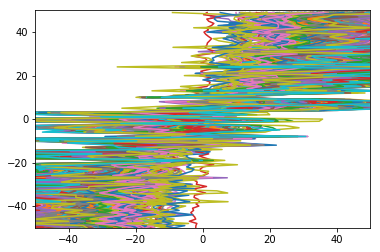

Train Discriminator
4000/4000 [==============================] - 0s 66us/step
0.99975
Train Generator
2000/2000 [==============================] - 0s 62us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 63us/step
0.9995
Train Generator
2000/2000 [==============================] - 0s 64us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 73us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 72us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 60us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 66us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 71us/step
0.7585
Train Generator
2000/2000 [==============================] - 0s 67us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 64us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 68us/step
1.0
Train Discriminator
4000/4000 

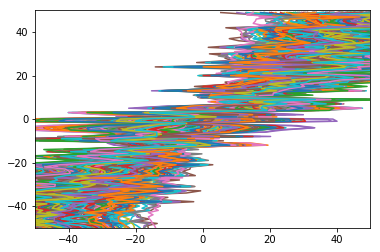

Train Discriminator
4000/4000 [==============================] - 0s 66us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 69us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 67us/step
0.7545
Train Generator
2000/2000 [==============================] - 0s 81us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 61us/step
0.76025
Train Generator
2000/2000 [==============================] - 0s 64us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 60us/step
0.75775
Train Generator
2000/2000 [==============================] - 0s 63us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 66us/step
0.7575
Train Generator
2000/2000 [==============================] - 0s 74us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 70us/step
0.76275
Train Generator
2000/2000 [==============================] - 0s 76us/step
1.0
Train Discriminator
40

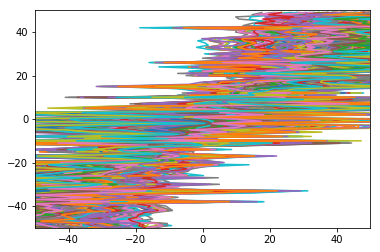

Train Discriminator
4000/4000 [==============================] - 0s 66us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 62us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 64us/step
0.9995
Train Generator
2000/2000 [==============================] - 0s 64us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 71us/step
0.75825
Train Generator
2000/2000 [==============================] - 0s 75us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 66us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 66us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 65us/step
0.75625
Train Generator
2000/2000 [==============================] - 0s 68us/step
1.0
Train Discriminator
4000/4000 [==============================] - 0s 73us/step
0.7585
Train Generator
2000/2000 [==============================] - 0s 67us/step
1.0
Train Discriminator
4000/4

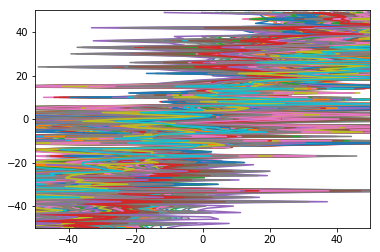

Train Discriminator
4000/4000 [==============================] - 0s 63us/step
1.0
Train Generator
2000/2000 [==============================] - 0s 81us/step
1.0


In [0]:
gen_acc=[]
disc_acc=[]
nepochs=100
while(nepochs>=0):
  # Create Fake Data
  BATCH_SIZE=2000
  input_noise=np.random.randn(BATCH_SIZE,INP_NOISE_SHAPE)
  real=DATA[np.random.choice(DATA.shape[0], BATCH_SIZE, replace=False)]
  fake=gen.predict(input_noise)
  newdata=np.concatenate([real,fake])
  newlab=np.concatenate([np.ones(BATCH_SIZE),np.zeros(BATCH_SIZE)])
  print("Train Discriminator")
  disc.trainable=True
  disc.fit(x=newdata,y=newlab, batch_size=10,epochs=5, verbose=0)
  
  temp=disc.evaluate(newdata,newlab)[1]
  disc_acc.append(temp)
  print(temp)
  
  ## Train Generator after 1) joining the models and  2) Discriminator as Frozen and 3) Create Data
  disc.trainable=False
  BATCH_SIZE=2000
  input_noise=np.random.randn(BATCH_SIZE,INP_NOISE_SHAPE)
  fakelab=np.ones(BATCH_SIZE)########NOTE NOW IT IS ONES
  print("Train Generator")
  jointmodel.fit(x=input_noise,y=fakelab,batch_size=10,epochs=5,verbose=0)
  
  temp=jointmodel.evaluate(input_noise,fakelab)[1]
  gen_acc.append(temp)
  print(temp)
  
  nepochs=nepochs-1
  if nepochs%10==0:
    input_noise=np.random.randn(1000,INP_NOISE_SHAPE)
    fake=gen.predict(input_noise)
    plot_lines(fake)



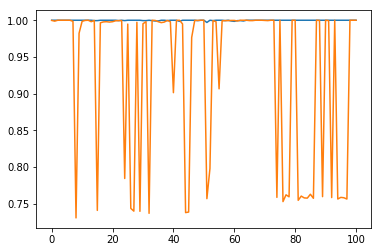

In [0]:
plt.plot(gen_acc)
plt.plot(disc_acc)

In [0]:
input_noise=np.random.randn(1000,INP_NOISE_SHAPE)
fake=gen.predict(input_noise)

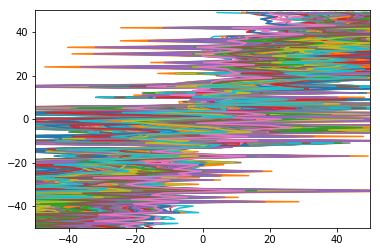

In [0]:
 plot_lines(fake)

### Best Generations as compared to Real
![alt text](https://github.com/nvshrao/GAN-for-Family-of-Lines/raw/master/GAN.png)
![title](https://github.com/nvshrao/GAN-for-Family-of-Lines/raw/master/Real.png)


##Bonus: The Walls From Attack on Titan with Tensorflow

If the Area between the walls are equal, then most illustrations of the walls are pretty wrong, here's how they may look actually

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

1.14.0-rc1


In [0]:
tf.reset_default_graph()
#r1 = tf.constant([2.0])
r1=5
r2 = tf.get_variable("r2", shape=(), dtype=tf.float32, trainable=True,constraint=lambda x: tf.clip_by_value(x, 0, np.infty))
r3 = tf.get_variable("r3", shape=(), dtype=tf.float32, trainable=True,constraint=lambda x: tf.clip_by_value(x, 0, np.infty))
loss=(np.pi*(r2)**2 - 2*np.pi*(r1)**2)**2  + (np.pi*(r3)**2 - np.pi*(r2)**2 - np.pi*(r1)**2)**2
optimizer =tf.train.AdamOptimizer(1)
step = optimizer.minimize(loss, var_list=[r2,r3])

1.5629677 0.02553451 29754.45
2.5629675 1.0255344 27808.215
3.5639737 1.7844737 25489.34
4.455727 2.6197062 23214.297
4.602655 4.3910995 19719.396
4.5948424 5.328861 15338.265
4.8971043 6.283854 11333.596
4.8971043 6.283854 7571.0425
5.432498 7.223699 4196.424
6.1109443 8.090695 1676.7583
7.6815624 9.348564 339.95392
8.275375 9.767315 913.9483
8.275375 9.767315 3407.5723
8.433238 10.10679 4760.7676
8.329953 10.287475 5002.5557
8.122987 10.229806 4364.4756
7.902653 9.96329 2908.0796
7.693831 9.562632 1353.0743
7.4776387 9.104933 384.19708
7.229369 8.66286 99.16046


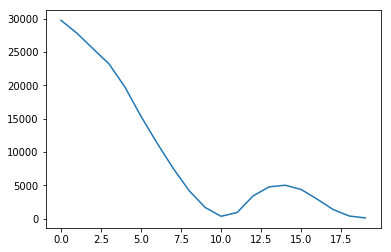

In [0]:
l=[]
with tf.Session() as s:  # in this way session will be closed automatically
    s.run(tf.global_variables_initializer())
    for i in range(20):
        _, curr_r2, curr_r3, curr_loss = s.run([step, r2, r3, loss])
        l.append(curr_loss)
        print(curr_r2, curr_r3, curr_loss)
plt.plot(l)

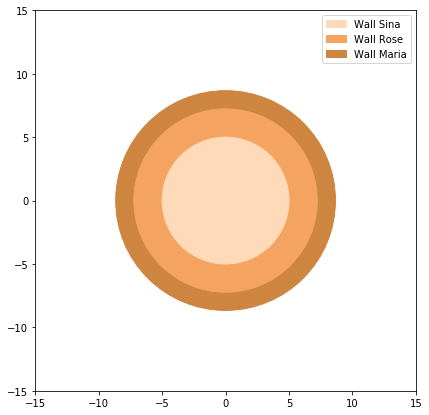

In [0]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0),curr_r3, color='peru')
circle2 = plt.Circle((0, 0), curr_r2,color='sandybrown')
circle3 = plt.Circle((0,0), r1, color='peachpuff')

fig, ax = plt.subplots() 

ax.legend([circle3,circle2,circle1], ['Wall Sina','Wall Rose','Wall Maria'])

ax.set_aspect('equal')
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

plt.xlim(-15,15)
plt.ylim(-15,15)
fig.set_size_inches(7, 7)

from matplotlib.pyplot import figure
#figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')